#Mushroom Classification

##Integrantes
* Gabriel Eduardo Camargo García
* Francisco Javier Silva Cadavid

##Librerías

In [9]:
#Importa la biblioteca de Kaggle
!pip install kaggle

#Analisis de datos
import numpy as np 
import pandas as pd

#Graficación y visualización
import matplotlib.pyplot as plt

#Aprendizaje automatico
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Lectura y ajuste del conjuto de datos

In [10]:
#Comenzamos descargando de mi drive el archivo kaggle.json para la identificacion en kaggle.
!gdown --id 1l3ivxJU4tBQb4KaOn5OSUTS8r_3SGX4s

#Ahora instalamos Kaggle e identificamos el archivo kaggle.json
! pip install -q kaggle
! mkdir ~/.kaggle
! cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descargamos el dataset y lo descomprimimos en una carpera llamada train
! kaggle datasets download -d uciml/mushroom-classification
! unzip mushroom-classification.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1l3ivxJU4tBQb4KaOn5OSUTS8r_3SGX4s
To: /content/kaggle.json
100% 66.0/66.0 [00:00<00:00, 244kB/s]
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 53.3MB/s]
Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [13]:
df = pd.read_csv("mushrooms.csv")
df.columns = df.columns.str.capitalize()
df.sample(10)

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
3827,e,f,y,e,t,n,f,c,b,p,...,s,g,p,p,w,o,p,k,y,d
2296,e,x,y,g,t,n,f,c,b,p,...,s,w,p,p,w,o,p,n,v,d
2904,e,x,y,g,t,n,f,c,b,n,...,s,w,w,p,w,o,p,n,y,d
7423,p,k,y,n,f,f,f,c,n,b,...,s,w,p,p,w,o,e,w,v,d
1660,e,f,f,g,f,n,f,w,b,h,...,s,w,w,p,w,o,e,k,s,g
2873,e,x,f,e,t,n,f,c,b,p,...,s,p,w,p,w,o,p,k,y,d
7591,p,f,s,e,f,f,f,c,n,b,...,s,p,w,p,w,o,e,w,v,d
6705,p,x,s,n,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
1816,p,x,f,g,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,y,g
2207,e,x,f,n,t,n,f,c,b,w,...,s,g,p,p,w,o,p,k,y,d


In [14]:
#Renombrado de los datos de las columnas
df["Class"] = df["Class"].replace({"p": "poisonous", "e": "edible"})
df["Cap-shape"] = df["Cap-shape"].replace({"x": "convex", "f": "flat", "b": "bell", "k": "knobbed", "s": "sunken", "c": "conical"})
df["Cap-surface"] = df["Cap-surface"].replace({"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"})
df["Cap-color"] = df["Cap-color"].replace({"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"})
df["Bruises"] = df["Bruises"].replace({"t": "bruises", "f": "no bruises"})
df["Odor"] = df["Odor"].replace({"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"})
df["Gill-attachment"] = df["Gill-attachment"].replace({"a": "attached", "d": "descending", "f": "free", "n": "notched"})
df["Gill-spacing"] = df["Gill-spacing"].replace({"c": "close", "w": "crowded", "d": "distant"})
df["Gill-size"] = df["Gill-size"].replace({"b": "broad", "n": "narrow"})
df["Gill-color"] = df["Gill-color"].replace({"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"})
df["Stalk-shape"] = df["Stalk-shape"].replace({"e": "enlarging", "t": "tapering"})
df["Stalk-root"] = df["Stalk-root"].replace({"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"})
df["Stalk-surface-above-ring"] = df["Stalk-surface-above-ring"].replace({"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"})
df["Stalk-surface-below-ring"] = df["Stalk-surface-below-ring"].replace({"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"})
df["Stalk-color-above-ring"] = df["Stalk-color-above-ring"].replace({"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"})
df["Stalk-color-below-ring"] = df["Stalk-color-below-ring"].replace({"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"})
df["Veil-type"] = df["Veil-type"].replace({"p": "partial", "u": "universal"})
df["Veil-color"] = df["Veil-color"].replace({"n": "brown", "o": "orange", "w": "white", "y": "yellow"})
df["Ring-number"] = df["Ring-number"].replace({"n": "none", "o": "one", "t": "two"})
df["Ring-type"] = df["Ring-type"].replace({"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"})
df["Spore-print-color"] = df["Spore-print-color"].replace({"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"})
df["Population"] = df["Population"].replace({"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"})
df["Habitat"] = df["Habitat"].replace({"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"})

df.head(10)

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print-color,Population,Habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no bruises,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
5,edible,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
6,edible,bell,smooth,white,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,numerous,meadows
7,edible,bell,scaly,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,scattered,meadows
8,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,pink,...,smooth,white,white,partial,white,one,pendant,black,several,grasses
9,edible,bell,smooth,yellow,bruises,almond,free,close,broad,gray,...,smooth,white,white,partial,white,one,pendant,black,scattered,meadows


In [15]:
df.shape

(8124, 23)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Class                     8124 non-null   object
 1   Cap-shape                 8124 non-null   object
 2   Cap-surface               8124 non-null   object
 3   Cap-color                 8124 non-null   object
 4   Bruises                   8124 non-null   object
 5   Odor                      8124 non-null   object
 6   Gill-attachment           8124 non-null   object
 7   Gill-spacing              8124 non-null   object
 8   Gill-size                 8124 non-null   object
 9   Gill-color                8124 non-null   object
 10  Stalk-shape               8124 non-null   object
 11  Stalk-root                8124 non-null   object
 12  Stalk-surface-above-ring  8124 non-null   object
 13  Stalk-surface-below-ring  8124 non-null   object
 14  Stalk-color-above-ring  

In [17]:
ds = df.copy()
for i in ds:
  print(i,":", ds[i].unique().size)

Class : 2
Cap-shape : 6
Cap-surface : 4
Cap-color : 10
Bruises : 2
Odor : 9
Gill-attachment : 2
Gill-spacing : 2
Gill-size : 2
Gill-color : 12
Stalk-shape : 2
Stalk-root : 5
Stalk-surface-above-ring : 4
Stalk-surface-below-ring : 4
Stalk-color-above-ring : 9
Stalk-color-below-ring : 9
Veil-type : 1
Veil-color : 4
Ring-number : 3
Ring-type : 5
Spore-print-color : 9
Population : 6
Habitat : 7


In [18]:
#Se elimina la columna Veil-type debido a que solo contiene un atributo
df = df.drop("Veil-type", axis=1)

In [ ]:
ds = df.copy()
for i in ds:
  print(i,":", ds[i].unique().size)

##Redes Neuronales

**ENTRENAMIENTO CON REDES NEURONALES**
Precisión del modelo: 100.0%
Puntaje F1 del modelo: 1.0
Sensibilidad: 1.0
Especificidad: 1.0


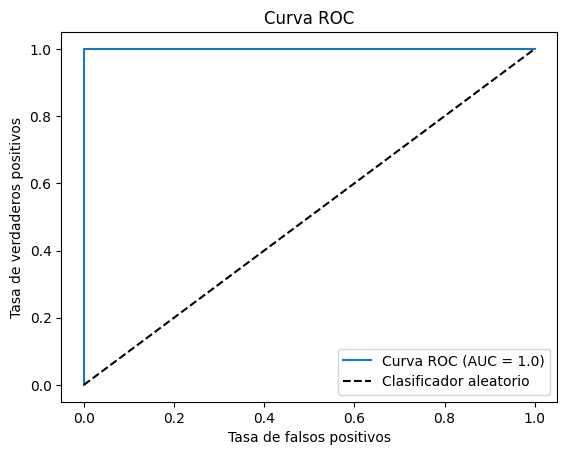

In [19]:
# LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento
model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Realizar predicción
y_pred = model.predict(X_test)

print("**ENTRENAMIENTO CON REDES NEURONALES**")

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {round(accuracy * 100, 2)}%")

# Calcular f1_score del modelo
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Puntaje F1 del modelo: {f1}")

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calcular la sensibilidad y la especificidad
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensibilidad: {round(sensitivity,2)}")
print(f"Especificidad: {round(specificity,2)}")

# Graficar la curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {round(auc_roc,2)})')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

##Máquina de Soporte vectorial

**ENTRENAMIENTO CON MÁQUINA DE SOPORTE VECTORIAL**
Precisión del modelo: 97.29%
Puntaje F1 del modelo: 0.9724310776942355
Sensibilidad: 0.99
Especificidad: 0.96


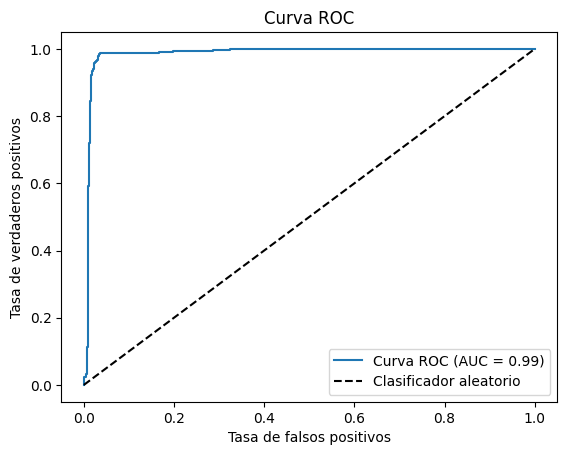

In [20]:
# LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entrenamiento
model = SVC(kernel='linear', random_state=42, probability=True)
model.fit(X_train, y_train)

# Realizar predicción
y_pred = model.predict(X_test)

print("**ENTRENAMIENTO CON MÁQUINA DE SOPORTE VECTORIAL**")

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {round(accuracy * 100, 2)}%")

# Calcular f1_score del modelo
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Puntaje F1 del modelo: {f1}")

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calcular la sensibilidad y la especificidad
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensibilidad: {round(sensitivity,2)}")
print(f"Especificidad: {round(specificity,2)}")

# Graficar la curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {round(auc_roc,2)})')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

##Naive Bayes

**ENTRENAMIENTO CON NAIVE BAYES**
Precisión del modelo: 89.88%
Puntaje F1 del modelo Naive Bayes: 0.8940418679549115
Sensibilidad: 0.88
Especificidad: 0.91


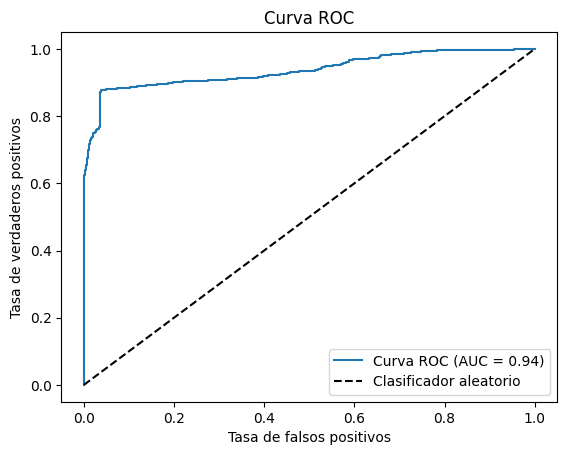

In [21]:
# LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entrenamiento
model = GaussianNB()
model.fit(X_train, y_train)

# Realizar predicción
y_pred = model.predict(X_test)

print("**ENTRENAMIENTO CON NAIVE BAYES**")

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {round(accuracy * 100, 2)}%")

# Calcular f1_score del modelo
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Puntaje F1 del modelo Naive Bayes: {f1}")

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calcular la sensibilidad y la especificidad
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensibilidad: {round(sensitivity,2)}")
print(f"Especificidad: {round(specificity,2)}")

# Graficar la curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {round(auc_roc,2)})')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

##Random Forest

**ENTRENAMIENTO CON RANDOM FOREST**
Precisión del modelo: 100.0%
Puntaje F1 del modelo: 1.0
Sensibilidad: 1.0
Especificidad: 1.0


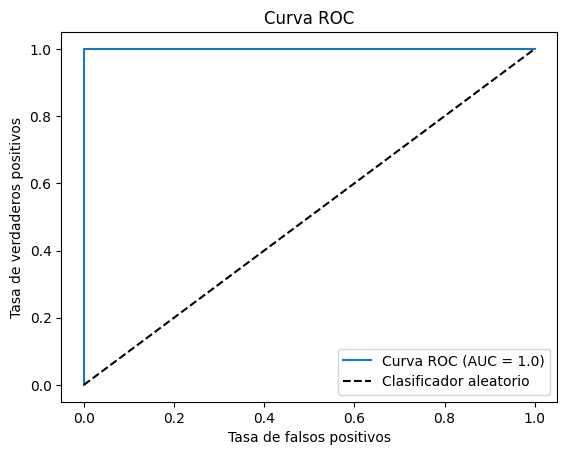

In [22]:
# LabelEncoder
label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])

# Dividir los datos en conjuntos de entrenamiento y prueba
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Entrenamiento
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Realizar predicción
y_pred = model.predict(X_test)

print("**ENTRENAMIENTO CON RANDOM FOREST**")

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {round(accuracy * 100, 2)}%")

# Calcular el f1_score del modelo
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Puntaje F1 del modelo: {f1}")

# Calcular la matriz de confusión
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calcular la sensibilidad y la especificidad
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f"Sensibilidad: {round(sensitivity,2)}")
print(f"Especificidad: {round(specificity,2)}")

# Graficar la curva ROC
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_roc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {round(auc_roc,2)})')
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()